In [141]:
import torch.nn.functional as F
from timeit import default_timer
from utilities3 import *

torch.manual_seed(0)
np.random.seed(0)

# Somatoria de Einstein

## $$ v_{i} \cdot \hat{e}_{i} = \sum_{i=1}^{3}v_i \hat{e}_i$$
## $$ w_{j} \cdot \hat{e}_{j} =\sum_{j=1}^{3}w_j \hat{e}_i$$
## $$\hat{e}_{i}\cdot\hat{e}_{j} = \delta_{i,j}$$
### onde ($i = j = 1$ ) ou ($i\neq j = 0$)

## $$ \overrightarrow{v}\cdot\overrightarrow{w} = (\sum_{i=1}^{3}v_i \hat{e}_i) \cdot (\sum_{j=1}^{3}w_j \hat{e}_j)$$
## $$=(v_i \hat{e}_i)\cdot w_j \hat{e}_j) = v_iw_j\delta_{i,j} = v_iw_i$$
## $$=v_1w_1 + v_2w_2+v_3w_3$$

In [2]:
x = torch.randn(3)
print(x)
y = torch.randn(4)
print(y)

tensor([ 1.5410, -0.2934, -2.1788])
tensor([ 0.5684, -1.0845, -1.3986,  0.4033])


In [3]:
torch.einsum('i,j->ij', x, y)

tensor([[ 0.8760, -1.6712, -2.1552,  0.6216],
        [-0.1668,  0.3182,  0.4104, -0.1184],
        [-1.2385,  2.3629,  3.0472, -0.8788]])

## $$ i,j -> ij = \sum_i^3( \sum_j^4 x_iy_j)$$
 
## $$  = \begin{matrix}
x_1y_1 & x_1y_2 & x_1y_3 & x_1y_4\\
x_2y_1 & x_2y_2 & x_2y_3 & x_2y_4\\
x_3y_1 & x_3y_2 & x_3y_3 & x_3y_4
\end{matrix}
 $$

In [4]:
As = torch.randn(3, 2, 5)
print(As)
Bs = torch.randn(3, 5, 4)
print(Bs)
torch.einsum('bij,bjk->bik', As, Bs).shape

tensor([[[-1.3527, -1.6959,  0.5667,  0.7935,  0.5988],
         [-1.5551, -0.3414,  1.8530,  0.7502, -0.5855]],

        [[-0.1734,  0.1835,  1.3894,  1.5863,  0.9383],
         [ 0.4889, -0.6731,  0.8728,  1.0554,  0.1778]],

        [[-0.2303, -0.3918, -1.5810,  1.7066, -0.4462],
         [ 0.7440,  1.5210,  3.4105, -1.5312, -1.2341]]])
tensor([[[ 5.0733e-01, -5.9103e-01, -5.6925e-01,  9.1997e-01],
         [ 1.1108e+00,  1.2899e+00, -1.4782e+00,  2.5672e+00],
         [ 4.4551e-01,  1.3253e+00, -1.6293e+00, -5.4974e-01],
         [-4.7983e-01, -4.9968e-01, -1.0670e+00,  1.1149e+00],
         [-1.0925e+00, -8.5194e-02, -9.3348e-02,  6.8705e-01]],

        [[-8.3832e-01,  8.9182e-04,  8.4189e-01, -4.0003e-01],
         [ 6.2114e-01,  6.3818e-01, -2.4600e-01,  2.3025e+00],
         [-1.8817e+00, -4.9727e-02, -1.0450e+00, -9.5650e-01],
         [-2.0252e-02, -4.3717e-01,  1.6459e+00, -1.3602e+00],
         [ 3.4457e-01,  5.1987e-01, -2.6133e+00, -1.6965e+00]],

        [[ 9.9403e-02,  

torch.Size([3, 2, 4])

# Fim 

# Transformada de Fourier

## Série de Fourier
### Um sinal Periódico pode ser representado pela soma de seno e cosseno.
### $$ T(t) = \dfrac{a_0}{2} + \sum_{n=1}^\infty [ a_n\cos(\dfrac{n\pi t)}{L} + b_n\sin(\dfrac{n\pi t)}{L}] $$
###$$ a_0 = \dfrac{1}{L}\int_c^{c+2L} f(t)dt$$
###$$ a_n = \dfrac{1}{L}\int_c^{c+2L} f(t)\cos(\dfrac{n\pi t}{L})dt$$
### $$ b_n = \dfrac{1}{L}\int_c^{c+2L} f(t)\sin(\dfrac{n\pi t}{L})dt$$

## Transformada
### Transformar uma função qualquer do seu domínio do tempo para o domínio das frequências.
### $$\mathcal{F}(\omega) =\mathcal{F}\{f(t)\} = \int_{-\infty}^{+\infty}f(t)e^{-i\omega t}dt  $$
#### A transformada de Fourier nos fornece as frequencias e amplitudes que formam o sinal

<img src='TF.png'>
<img src='TF3.png'>

### Transformada Inversa 
### $$f(t) = \int_{-\infty}^{+\infty}\mathcal{F}(\omega)e^{i\omega t}d\omega  $$
### Transformar novamente  o domínio das frequências para o domínio do tempo.

# -------------------------------------------------------------------------------------------------------

# Operador Neural
## Matematicamente operadores são usualmente referidos como mapeadores entre espaço de funções como integração, diferenciação, por exemplo. Diferente dos métodos clássicos de solucionadores de equações diferenciais como, por exemplo, elementos finitos, diferença finita que discretizam o domínio físico e tornam o problema no espaço euclidiano de dimensão finita, o operador neural é capaz de aprender diretamente o operador da equação diferencial e são invariantes a discretização do domínio, que em certo sentido, está mais próximo da solução real, ou seja, aprende a função continua ao invés de valores discretizados.

### 1) => São independente das malhas de discretização, que produz um conjunto de parâmetros que podem ser usado em diferentes tipos de discretização.
### 2) => Transfere soluções entre malhas diferentes.
### 3) => São treinados diretamente nos dados.
### 4) => Aprendem o mapeamento de funções, generalizando em diferentes discretizações. Com isso podem ser treinado com dados menos precisos e ele é capaz de aprender e gerar resultados precisos.



### Considere o domínio $\mathcal{D} \in \mathcal{R}^d$
### Considere a equação diferencial:
### $$\mathcal{L}u = f $$
#### onde $\mathcal{L}$ é um operador que mapea $u$ para uma função $f$
### Por exemplo:
$$
\begin{align}
    -\nabla\cdot(a(x)\nabla u(x)) &= f(x)  &&  x \in D \\
    u(x) &= 0  && x \in \partial D,
\end{align}
$$

#### Para qualquer função $a(x)$, a equação tem um solução $u(x)$, mantendo $f(x)$ fixo.
#### $\mathcal{A}$ é o espaço de funções de $a(x)$ a ser mapeado no espaço de funções $\mathcal{U}$
### $\mathcal{A} \Rightarrow \mathcal{G}^{\dagger}\Rightarrow \mathcal{U}$

### $a_j(x) =>$ Função no espaço  $\mathcal{A}$

### $u_j(x) =>$ Função no espaço  $\mathcal{U}$
### $\{a_j,u_j\}$ são os pares de entrada-saída.

#### Queremos aprender o operador $\mathcal{G}^{\dagger}$ que faz esse mapeamento.

### $$u_j = \mathcal{G}^{\dagger}(a_j)$$
### $$ \mathcal{G}_{\theta} \sim \mathcal{G}^{\dagger}$$
#### Onde $\mathcal{G}_{\theta}$ é uma rede neural com parâmetro $\theta$ ( aprendido).
#### Queremos oncontrar $\theta$ que minimise a função de custo.

### $$ 
\begin{align}
\min_{\theta}\mathcal{L}_{a\sim u} [\mathcal{G}(a,\theta),\mathcal{G}^{\dagger}_a]
\end{align}
$$
#### $a(x)$ e $u(x)$ são funções. Para o processo de treinamento vamos trabalhar com $a(x),u(x)$ como sendo dados, ou seja essas funções são discretizadas em $a_j,u_j$. Essa discretização pode ser feita por qualquer método. Com isso podemos usar como dados de treinamento os pares $\{a_j,u_j\}_{j=1}^N$.
#### $N$ é o número de pontos discretizados.

### Resumindo: $a(x),u(x)$ vem discretizados ($P_N = (\bf{x}_1, \cdots \bf{x}_N) \quad \in \quad D$) e $\{a_j,u_j\}$ são observações.

## Formulação Kernel

### $$
\begin{align}
    (\zeta_a u)(x) &= f(x)  &&  x \in D \\
    u(x) &= 0  && x \in \partial D,
\end{align}
$$
#### sob condições gerais, podemos definir a função de Grenn $G$ como a única solução do problema.
### $$
\begin{align}
    \zeta_a G(x) =\delta_x
\end{align}
$$
#### $\delta_x$ é a delta de Dirac, o que torna a equação homogênea, pois $\delta_x = 0$ para $x\neq y$.
### $$
\begin{align}
    u(x) =\int_D G_a(x,y)f(y)dy
\end{align}
$$ 
#### onde $G$ irá depender do coeficiente $a$.
#### Como $x\neq y$ é contínua, então $\zeta_a$ é uniformemente contínua. Podemos modelar o kernel  atravéz de uma rede neural $\mathcal{k}$, semelhante a função de Green. A rede $\mathcal{k}$ recebe uma entrada $(x,y)$. Como $\mathcal{k}$ depende de $a$, vamos deixar que  $\mathcal{k}$ dependa da entrada ($a(x),u(x)$)

### $$
\begin{align}
    u(x) =\int_D \mathcal{k}(x,y,a(x),a(y))f(y)dy
\end{align}
$$ 

#### Vamos discretizar $u(x)$ como sendo $u(x) \sim u(x)_t$, onde $u$ é iterado no tempo $t(t=0,\cdots,. T)$.
### $$
\begin{align}
    u_{t+1} =\int_D \mathcal{k}(x,y,a(x),a(y))u_tdy
\end{align}
$$
#### onde $u_0(x) = (x,a(x))$ e $u_T$ é a saída final. 
#### Para usar a vantagem das redes neurais, mapeamos a função $a(x0$ em uma dimensão de representação.
### $$
\begin{align}
    u(x) & \in \mathcal{R}^d\\
    v(x) & \in \mathcal{R}^n 
\end{align} 
$$
### onde $n > d$
### $$
\begin{align}
    v_0(x)  &= NN_1(x,a(x))\\
    v_t+1(x) &= \sigma(Wv_t(x) + \int_{B(x)} \mathcal{k}_{\theta}(x,y,a(x),a(y))v_t(y)dy & para \quad t = 1,\cdots,T \\
    u(x) = NN_2(v_T(x))
\end{align} 
$$
#### onde $NN_1$ e $NN_2$ são redes neurais feed-forward.

#### \sigma => Relu

#### W => Trransformação Linear

### $$
\begin{align}
   \int \sim \sum 
\end{align} 
$$
#### Usando Gráfos.

### $$
\int_{B(x)}\mathcal{k}_{\theta}(x,y,a(x),a(y))v_t(y)dy \approx \dfrac{1}{|N|}\sum_{y \in N(x)}\mathcal{k}_{\theta}(x,y,a(x),a(y))v_t(y)
$$
#### onde $N(x)$ é o visinho de $x$ de acordo com o grafo. $\mathcal{k}_{\theta}$ é um operador convolucional.


## Operador Neural de Fourier
### Substitui o operador integral por um operador convolucional definido no espaço de Fourier
### $$
\begin{align}
 (\mathcal{F}f)_j(\kappa) =  = \int_{D}f_j(x)e^{-2i\pi(x,\kappa)}dx\\
 (\mathcal{F}^{-1}f)_j(x) =  = \int_{D}f_j(\kappa)e^{-2i\pi(x,\kappa)}d\kappa\\
 \mathcal{k}(a,\theta,v_t)(x) = \mathcal{F}^{-1}(\mathcal{F}(\mathcal{k}_{\theta})\mathcal{F}(v_t))(x)
\end{align} 
$$ 
### Onde podemos parametrizar no espaço de Fourier
### $$ \mathcal{k}(a,\theta,v_t)(x) = \mathcal{F}^{-1}(R_{\theta}(\mathcal{F}(v_t))(x)$$
### Onde $R_{\theta}$ é a transformação de uma função periódica $\mathcal{k}:D -> \mathcal{R}^{v \times v}$ parametrizada por $\theta$ $\in$ $\Theta$.
### $R_{\theta}$ é parametrizado como um tensor complexo.
### Não utilizamos todos os modos de Fourier, ou seja, truncamos a série de Fourier em um número máximo de modos ($\kappa_j \leq \kappa_{\max,j}$ para $(j=1,\cdots,d)$. Note que assumimos que $\mathcal{k}$ é periódico e admite uma expanção de series de Fourier como modos discretos $\kappa \in \mathcal{Z}^{d}$. 
<img src='fig1.png'>



## Cama de Fourier
### No mundo real as imagens tem muitas bordas e formas, então as redes convolucionais podem capturá-las bem com o kernel de convolução local. Por outro lado, as entradas e saídas de equações diferenciais parciais sáo funções contínuas. É mais eficiente representar elas no espaço de Fourier e fazer a convolução global. A dois motivos principais para isso:
### 1) É rápido, porque a convolução é quase linear.
### 2) É mais eficiente. A entrada e saída são funções contínuas, assim é mais eficiente representar no espaço de Fourier.
### A convolução espacial é equivalente à multiplicação pontual no domínio de Fourier. Para implementar o operador de convolução global, primeiro fazemos uma transformada de Fourier, depois uma transformada linear e uma transformada inversa.


## Spectral Convolutions


### Dado o estado discretizado de entrada (com valor real) $a$ (com potencialmente mais de um canal) definido em uma malha equidistante; faça os seguintes passos:

### 1. Transforme $a$ no espaço de Fourier (aqui usando a transformada de Fourier de valor real): $\hat{a} = \text{rfft}(a)$ (lote sobre a dimensão do canal)
### 2. Execute uma multiplicação de matrizes em lote com um vetor de peso de valor complexo $W$ para os primeiros modos $K$: $\hat{\tilde{a}}_{0:K} = W\hat{a}_{0: K}$
### 3. Defina todos os modos restantes como zero $\hat{\tilde{a}}_{K:} = 0 + 0i$
### 4. Transforme de volta para o espaço real $\tilde{a} = \text{irfft}(\hat{\tilde{a}})$
### Os parâmetros que podem ser aprendidos para cada convolução espectral são a matriz de peso de valor complexo de forma `(canais_out, canais_in, modos)` (uma vez que tem valor complexo, na verdade possui `2 * canais_out * canais_in * modos` parâmetros reais)


In [5]:
class SpectralConv1d(nn.Module): 
    def __init__(self, in_channels, out_channels, modes1):
        super(SpectralConv1d, self).__init__()

        """
        1D Fourier layer. It does FFT, linear transform, and Inverse FFT.    
        """

        self.in_channels = in_channels #(a(x),x) => concatenando no eixo z 
        self.out_channels = out_channels # canal do u(x)
        self.modes1 = modes1  #Número de modos de Fourier a serem multiplicados, no máximo floor(N/2) + 1, vou usar metade


        self.scale = (1 / (in_channels*out_channels)) #normalização
        self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, dtype=torch.cfloat))
        # w(canal_in,canal_out, modos) Parameter cria um tensor dinamico.
    # Complex multiplication
    
    def compl_mul1d(self, input, weights):
        # (batch, in_channel, x ), (in_channel, out_channel, x) -> (batch, out_channel, x)
        return torch.einsum("bix,iox->box", input, weights)

    def forward(self, x):
        batchsize = x.shape[0]
        #Compute Fourier coeffcients up to factor of e^(- something constant)
        x_ft = torch.fft.rfft(x)

        # Multiply relevant Fourier modes
        out_ft = torch.zeros(batchsize, self.out_channels, x.size(-1)//2 + 1,  device=x.device, dtype=torch.cfloat)
        out_ft[:, :, :self.modes1] = self.compl_mul1d(x_ft[:, :, :self.modes1], self.weights1)

        #Return to physical space
        x = torch.fft.irfft(out_ft, n=x.size(-1))
        return x

### Passo a passo do código acima

In [6]:
scale = (1 / (2*1)) #normalização
weights1 = nn.Parameter(scale * torch.rand(2, 1, 16, dtype=torch.cfloat))
print(weights1.shape)
weights1 # cria um matriz de peso complexa


torch.Size([2, 1, 16])


Parameter containing:
tensor([[[0.3006+0.4090j, 0.4868+0.4088j, 0.4874+0.2319j, 0.0254+0.1315j,
          0.4202+0.2484j, 0.1257+0.0584j, 0.0160+0.0390j, 0.1993+0.3871j,
          0.3852+0.0089j, 0.4059+0.0544j, 0.1971+0.1486j, 0.2018+0.2009j,
          0.0257+0.0341j, 0.2109+0.2532j, 0.1364+0.3442j, 0.0250+0.2331j]],

        [[0.4699+0.1480j, 0.4758+0.3405j, 0.0244+0.4082j, 0.2212+0.1384j,
          0.4499+0.0480j, 0.2768+0.1977j, 0.4285+0.3198j, 0.3701+0.3383j,
          0.1899+0.1974j, 0.0440+0.3855j, 0.4485+0.4211j, 0.0737+0.2611j,
          0.0738+0.1124j, 0.1043+0.3354j, 0.1010+0.2445j, 0.2605+0.4112j]]],
       requires_grad=True)

<img src='R.png'>

In [7]:
 batchsize = x.shape[0]
def compl_mul1d( input, weights):
        # (batch, in_channel, x ), (in_channel, out_channel, x) -> (batch, out_channel, x)
        return torch.einsum("bix,iox->box", input, weights)


In [8]:
x_ft = torch.fft.rfft(x) #transformando meu a(x) modificado ( junto com a grade(figura)) com a transformada de fourier
print(x_ft.shape)
x_ft[0] # meu X no domínio das frequencias

torch.Size([2])


tensor(-0.9312+0.j)

In [9]:
print(x_ft.shape)
weights1.shape

torch.Size([2])


torch.Size([2, 1, 16])

In [10]:
x_ft = x_ft.permute(0, 2, 1) #preciso fazer a troca de indice para usar a soma de einsten
x_ft.shape


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 1 is not equal to len(dims) = 3

In [ ]:
out_ft = torch.zeros(batchsize, 1, x_ft.size(-1)//2 + 1,  device=x.device, dtype=torch.cfloat)
out_ft

In [ ]:
modes1 = 16 # vou truncar os modos da serie de fourier em 16
aa = compl_mul1d(x_ft[:, :, :modes1], weights1)
print(aa.shape)
out_ft[:, :, :modes1] = compl_mul1d(x_ft[:, :, :modes1], weights1)

In [ ]:
x = torch.fft.irfft(out_ft, n=x_ft.size(-1)) #uso a transformada de fourier para ir para o dominio dos tempo

In [11]:
x.shape

torch.Size([3])

# ---------------------------------------------------------------------------------------------------------------

# Arquitetura da rede convolucional
### Vamos usar duas redes neural conv1d  com função de ativação grelu

### Understanding Pytorch 1 dimensional CNN (Conv1d) Shapes 

input channels = 3

output channels = 1

filter = 2

stride = 1 (default)

conv1 = nn.Conv1d(d, 1, 2)

<img src='conv1d.png'>

In [12]:
import numpy
import torch.nn as nn
import torch
n=1 #batch size
l=5 #sentence len
d=3 #embedding dimension>> rand_arr = torch.rand(n,l,d)
rand_arr = torch.rand(n,l,d)
rand_arr.shape

torch.Size([1, 5, 3])

In [13]:
rand_arr

tensor([[[0.1220, 0.1567, 0.2097],
         [0.8500, 0.3203, 0.9217],
         [0.6808, 0.5633, 0.4963],
         [0.4012, 0.5627, 0.3858],
         [0.4965, 0.5638, 0.1089]]])

In [14]:
conv1 = nn.Conv1d(d, 1, 2)
conv1

Conv1d(3, 1, kernel_size=(2,), stride=(1,))

In [15]:
rand_arr_permute = rand_arr.permute(0,2,1)
print(rand_arr_permute)
rand_arr_permute.shape

tensor([[[0.1220, 0.8500, 0.6808, 0.4012, 0.4965],
         [0.1567, 0.3203, 0.5633, 0.5627, 0.5638],
         [0.2097, 0.9217, 0.4963, 0.3858, 0.1089]]])


torch.Size([1, 3, 5])

In [16]:
conv1(rand_arr_permute).shape

torch.Size([1, 1, 4])

# ---------------------------------------------------------------------------------------------------------------

In [17]:
class MLP(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels):
        super(MLP, self).__init__()
        self.mlp1 = nn.Conv1d(in_channels, mid_channels, 1)
        self.mlp2 = nn.Conv1d(mid_channels, out_channels, 1)

    def forward(self, x):
        x = self.mlp1(x)
        x = F.gelu(x)
        x = self.mlp2(x)
        return x

In [18]:
class FNO1d(nn.Module):
    def __init__(self, modes, width):
        super(FNO1d, self).__init__()

        """
        A rede geral. Ele contém 4 camadas da camada de Fourier.
         1. Eleve a entrada para a dimensão do canal desejado por self.fc0 .
         2. 4 camadas dos operadores integrais u' = (W + K)(u).
             W definido por self.w; K definido por self.conv .
         3. Projete do espaço do canal para o espaço de saída por self.fc1 e self.fc2 .
        
         entrada: a solução da condição inicial e localização (a(x), x)
         forma de entrada: (tamanho do lote, x = s, c = 2)
         saída: a solução de um timestep posterior
         formato de saída: (tamanho do lote, x = s, c = 1)
​

        """

        self.modes1 = modes
        self.width = width
        self.padding = 8 # preencha o domínio se a entrada não for periódica

        self.p = nn.Linear(2, self.width) # input channel_dim is 2: (u0(x), x) => crio os pesos e bias linear
        #faço a transformada de fourier e a transformada inversa.
        self.conv0 = SpectralConv1d(self.width, self.width, self.modes1)
        self.conv1 = SpectralConv1d(self.width, self.width, self.modes1)
        self.conv2 = SpectralConv1d(self.width, self.width, self.modes1)
        self.conv3 = SpectralConv1d(self.width, self.width, self.modes1)
        
        self.mlp0 = MLP(self.width, self.width, self.width) #uso a convolução 1d
        self.mlp1 = MLP(self.width, self.width, self.width)
        self.mlp2 = MLP(self.width, self.width, self.width)
        self.mlp3 = MLP(self.width, self.width, self.width)
        
        self.w0 = nn.Conv1d(self.width, self.width, 1)
        self.w1 = nn.Conv1d(self.width, self.width, 1)
        self.w2 = nn.Conv1d(self.width, self.width, 1)
        self.w3 = nn.Conv1d(self.width, self.width, 1)
        
        self.q = MLP(self.width, 1, self.width*2)  # output channel_dim is 1: u1(x)

    def forward(self, x):
        grid = self.get_grid(x.shape, x.device) #cria a grade
        x = torch.cat((x, grid), dim=-1) # concatena a grade com a entrada a 
        x = self.p(x) #faz a codificção v(x) = NN1(a(x)) => v(x) = W.a(x)+b
        x = x.permute(0, 2, 1) # faz a permuta para usar a soma de einsten
        # x = F.pad(x, [0,self.padding]) # pad the domain if input is non-periodic
       # Bloco 1
       # 
        x1 = self.conv0(x) # faz a transformação de fourier, filtrando o modos e multiplicando pela matriz R e
        #retorna para o dominio dos tempo.
        x1 = self.mlp0(x1) # realiza a convolução de x
        x2 = self.w0(x)  # faz a convolução de x que não foi para o domínio de fourier
        x = x1 + x2     # soma
        x = F.gelu(x)  # aplica a função de ativação não linear
        
        #bloco 2
        x1 = self.conv1(x)
        x1 = self.mlp1(x1)
        x2 = self.w1(x)
        x = x1 + x2
        x = F.gelu(x)
        
        #bloco 3 
        x1 = self.conv2(x)
        x1 = self.mlp2(x1)
        x2 = self.w2(x)
        x = x1 + x2
        x = F.gelu(x)
        
        #bloco4
        x1 = self.conv3(x)
        x1 = self.mlp3(x1)
        x2 = self.w3(x)
        x = x1 + x2
        
        # x => bloco1 => bloco2 => bloco3 => bloco4 => 

        # x = x[..., :-self.padding] # pad the domain if input is non-periodic
        x = self.q(x) # Faz a codificação de u(x) = NN2(v(x))
        x = x.permute(0, 2, 1) # Volta os indices normais.
        return x

    def get_grid(self, shape, device):
        batchsize, size_x = shape[0], shape[1]
        gridx = torch.tensor(np.linspace(0, 1, size_x), dtype=torch.float)
        gridx = gridx.reshape(1, size_x, 1).repeat([batchsize, 1, 1])
        return gridx.to(device)

# Esse processo pode ser explicado na imagem abaixo
<img src='amostras.png'>

In [144]:
ntrain = 1000
ntest = 200

sub =2**5 #subsampling rate
h = 2**13 // sub #total grid size divided by the subsampling rate
s = h

batch_size = 20
learning_rate = 0.001
epochs = 50
iterations = epochs*(ntrain//batch_size)

modes = 16
width = 64

################################################################
# read data
################################################################

# Data is of the shape (number of samples, grid size)

In [40]:
dataloader = MatReader('burgers_data_R10.mat')

In [145]:
x_data = dataloader.read_field('a')[:,::sub]
print(x_data.shape)
y_data = dataloader.read_field('u')[:,::sub]


torch.Size([2048, 256])


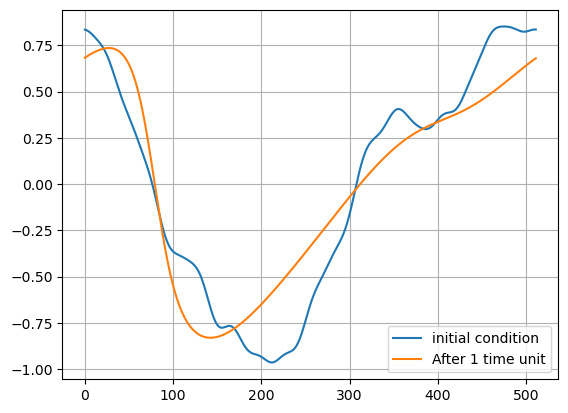

In [54]:
import matplotlib.pyplot as plt
plt.plot(x_data[0], label="initial condition")
plt.plot(y_data[0], label="After 1 time unit")
plt.legend()
plt.grid()

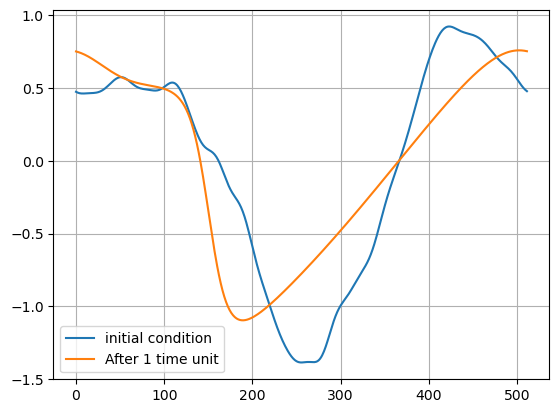

In [55]:
plt.plot(x_data[1], label="initial condition")
plt.plot(y_data[1], label="After 1 time unit")
plt.legend()
plt.grid()

In [149]:
x_train = x_data[:ntrain,:]
y_train = y_data[:ntrain,:]
x_test = x_data[-ntest:,:]
y_test = y_data[-ntest:,:]

x_train = x_train.reshape(ntrain,s,1)
x_test = x_test.reshape(ntest,s,1)
print(x_test.shape)
x_train.shape

torch.Size([200, 256, 1])


torch.Size([1000, 256, 1])

In [150]:
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=batch_size, shuffle=False)
list(test_loader)

[[tensor([[[ 0.0283],
           [ 0.0320],
           [ 0.0331],
           ...,
           [ 0.0120],
           [ 0.0172],
           [ 0.0229]],
  
          [[-1.2882],
           [-1.2636],
           [-1.2409],
           ...,
           [-1.3713],
           [-1.3428],
           [-1.3148]],
  
          [[ 0.0321],
           [ 0.0015],
           [-0.0304],
           ...,
           [ 0.1196],
           [ 0.0904],
           [ 0.0615]],
  
          ...,
  
          [[-0.4104],
           [-0.4184],
           [-0.4255],
           ...,
           [-0.3848],
           [-0.3933],
           [-0.4019]],
  
          [[-0.4258],
           [-0.4170],
           [-0.4086],
           ...,
           [-0.4443],
           [-0.4401],
           [-0.4338]],
  
          [[-0.3547],
           [-0.3570],
           [-0.3552],
           ...,
           [-0.3373],
           [-0.3431],
           [-0.3495]]]),
  tensor([[ 0.0016, -0.0084, -0.0181,  ...,  0.0330,  0.0223,  0.0118],

In [151]:
# model
model = FNO1d(modes, width)#.cuda()
print(count_params(model))

582849


In [152]:
model

FNO1d(
  (p): Linear(in_features=2, out_features=64, bias=True)
  (conv0): SpectralConv1d()
  (conv1): SpectralConv1d()
  (conv2): SpectralConv1d()
  (conv3): SpectralConv1d()
  (mlp0): MLP(
    (mlp1): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    (mlp2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  )
  (mlp1): MLP(
    (mlp1): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    (mlp2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  )
  (mlp2): MLP(
    (mlp1): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    (mlp2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  )
  (mlp3): MLP(
    (mlp1): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    (mlp2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  )
  (w0): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (w1): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (w2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (w3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (q): MLP(
    (mlp1): Conv1d(64, 128, kernel_size=(1,), stride=(1,

In [153]:
################################################################
# training and evaluation
################################################################
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=iterations)

In [154]:
myloss = LpLoss(size_average=False)

In [156]:
myloss = LpLoss(size_average=False)
for ep in range(epochs):
    model.train()
    t1 = default_timer()
    train_mse = 0
    train_l2 = 0
    l2_train = []
    l2_test = []
    for x, y in train_loader:
       # x, y = x.cuda(), y.cuda()

        optimizer.zero_grad()
        out = model(x)

        mse = F.mse_loss(out.view(batch_size, -1), y.view(batch_size, -1), reduction='mean')
        l2 = myloss(out.view(batch_size, -1), y.view(batch_size, -1))
        l2.backward() # use the l2 relative loss

        optimizer.step()
        scheduler.step()
        train_mse += mse.item()
        train_l2 += l2.item()

    model.eval()
    test_l2 = 0.0
    with torch.no_grad():
        for x, y in test_loader:
            #x, y = x.cuda(), y.cuda()

            out = model(x)
            test_l2 += myloss(out.view(batch_size, -1), y.view(batch_size, -1)).item()

    train_mse /= len(train_loader)
    train_l2 /= ntrain
    test_l2 /= ntest
    l2_train.append(train_l2)
    l2_test.append(test_l2)
    t2 = default_timer()
    print(ep, t2-t1, train_mse, train_l2, test_l2)

0 40.06853966299968 0.0007787961735448335 0.041615642786026 0.06087821960449219
1 39.806924440999865 0.00048571678868029265 0.03562240618467331 0.025978993922472
2 40.00240702600058 0.0002170268158442923 0.020504169911146165 0.020864144414663315
3 38.625356128999556 0.00031329840472608337 0.03201941022276878 0.02176970437169075
4 37.86068186600096 0.0003028429283585865 0.030621962159872056 0.0212822163105011
5 40.251104278999264 0.00026035413902718573 0.028390113145112993 0.0328059133887291
6 40.492209056999855 0.00023154718426667386 0.027837256640195845 0.02222389981150627
7 45.32898435400057 0.00014383250610990216 0.02096378843486309 0.011910305768251419
8 44.09043578300043 7.219641429401236e-05 0.014334559455513955 0.011726975962519646
9 39.18347587400058 0.000143177037643909 0.02250189682841301 0.01980320528149605
10 37.39237373800097 0.0001316385011159582 0.01840616510808468 0.014401136189699173
11 38.37766481399922 7.402741322948714e-05 0.01391182242333889 0.021217852383852005
12

In [157]:
loss_train = np.array(l2_train)
loss_test = np.array(l2_test)

In [159]:
loss_train

array([0.00406595])

In [ ]:
torch.save(model, 'ns_fourier_burgers')
pred = torch.zeros(y_test.shape)
index = 0
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)
with torch.no_grad():
    for x, y in test_loader:
        test_l2 = 0
        #x, y = x.cuda(), y.cuda()

        out = model(x).view(-1)
        pred[index] = out

        test_l2 += myloss(out.view(1, -1), y.view(1, -1)).item()
        print(index, test_l2)
        index = index + 1

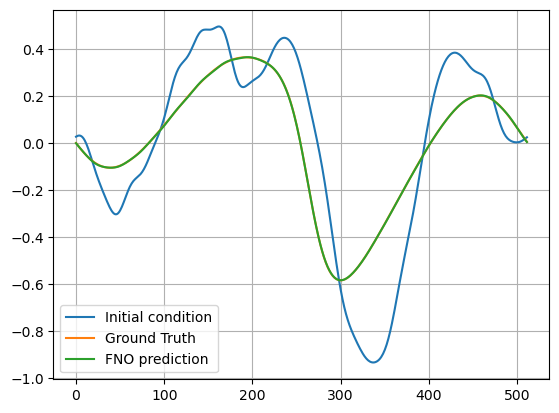

In [81]:
plt.plot(x_test[0], label="Initial condition")
plt.plot(y_test[0], label="Ground Truth")
plt.plot(fno1d[:,:][0].view(-1).detach().numpy(), label="FNO prediction")
plt.legend()
plt.grid()

In [89]:
dif = (model(x_test)[0]).view(-1) - y_test[0]

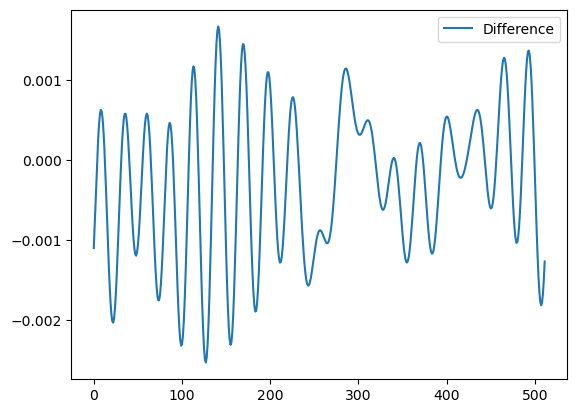

In [90]:
plt.plot(dif.detach().numpy(), label="Difference")
plt.legend()

In [75]:
a = fno1d[:,:][0].view(-1)


In [77]:
a.detach().numpy()

array([ 4.81115654e-04, -4.26674634e-03, -8.92565027e-03, -1.35071632e-02,
       -1.80227421e-02, -2.24828236e-02, -2.68958621e-02, -3.12677026e-02,
       -3.56008783e-02, -3.98942605e-02, -4.41427976e-02, -4.83378135e-02,
       -5.24669290e-02, -5.65149114e-02, -6.04641326e-02, -6.42955005e-02,
       -6.79893792e-02, -7.15264454e-02, -7.48887211e-02, -7.80604258e-02,
       -8.10286701e-02, -8.37840140e-02, -8.63209367e-02, -8.86379108e-02,
       -9.07374620e-02, -9.26258415e-02, -9.43127051e-02, -9.58104208e-02,
       -9.71333683e-02, -9.82971787e-02, -9.93177667e-02, -1.00210547e-01,
       -1.00989558e-01, -1.01666741e-01, -1.02251463e-01, -1.02749743e-01,
       -1.03164375e-01, -1.03494599e-01, -1.03736445e-01, -1.03882834e-01,
       -1.03924431e-01, -1.03849925e-01, -1.03647090e-01, -1.03303440e-01,
       -1.02807164e-01, -1.02147833e-01, -1.01317212e-01, -1.00309774e-01,
       -9.91232544e-02, -9.77587849e-02, -9.62210447e-02, -9.45181027e-02,
       -9.26610008e-02, -

In [64]:
y_test[0]

tensor([ 1.5794e-03, -3.4493e-03, -8.4028e-03, -1.3275e-02, -1.8061e-02,
        -2.2755e-02, -2.7351e-02, -3.1845e-02, -3.6232e-02, -4.0506e-02,
        -4.4665e-02, -4.8704e-02, -5.2618e-02, -5.6406e-02, -6.0062e-02,
        -6.3584e-02, -6.6970e-02, -7.0217e-02, -7.3322e-02, -7.6283e-02,
        -7.9099e-02, -8.1769e-02, -8.4289e-02, -8.6661e-02, -8.8881e-02,
        -9.0951e-02, -9.2869e-02, -9.4636e-02, -9.6250e-02, -9.7713e-02,
        -9.9024e-02, -1.0018e-01, -1.0119e-01, -1.0205e-01, -1.0277e-01,
        -1.0333e-01, -1.0375e-01, -1.0402e-01, -1.0415e-01, -1.0413e-01,
        -1.0398e-01, -1.0369e-01, -1.0326e-01, -1.0270e-01, -1.0200e-01,
        -1.0117e-01, -1.0022e-01, -9.9136e-02, -9.7930e-02, -9.6603e-02,
        -9.5157e-02, -9.3593e-02, -9.1915e-02, -9.0125e-02, -8.8225e-02,
        -8.6218e-02, -8.4106e-02, -8.1892e-02, -7.9579e-02, -7.7167e-02,
        -7.4661e-02, -7.2063e-02, -6.9374e-02, -6.6598e-02, -6.3737e-02,
        -6.0793e-02, -5.7769e-02, -5.4667e-02, -5.1

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

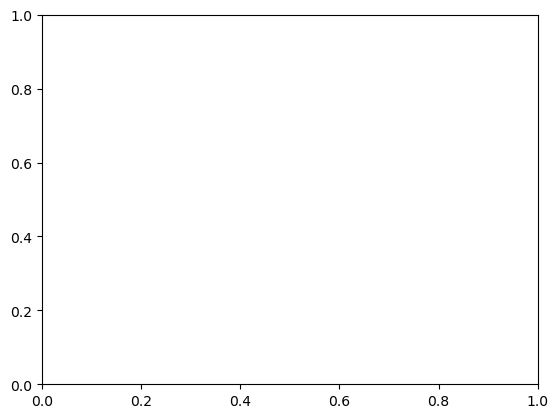

In [60]:
plt.plot(fno1d[0], label="initial condition")
plt.plot(y_data[0], label="After 1 time unit")
plt.legend()
plt.grid()